# <font color='#d35400'> Lab 9 | Classification </font>
In this lab, we use classification methods to predict whether breast tissue samples are malignant or benign. We set up an experiment, train a baseline model, perform feature selection, statistically compare candidate models to see if one approach outperforms another, and then perform a final training and characterization of the logistic regression model using appropriate features.

<p align="center">
  <img src="raccoon.jpg" alt="Raccoon" width="400"/>
</p>

## <font color = '#FF8C00'> Section 1 </font> | Loading the Data
In this section, we load the data and standardize the features. We then characterize the dependent variable and plot a bar chart of the diagnosis values. Lastly, we include a short description of the dataset. 

### <font color = '#FF8C00'> Standardizing the Features </font>
We start this section by first standardizing the numerical features. We achieve this by using the `StandardScaler()` to do just that.

In [1]:
# importing the pandas library
import pandas as pd

column_names = [
    "ID", "Diagnosis",
    "radius1", "texture1", "perimeter1", "area1", "smoothness1", "compactness1", "concavity1", "concave_points1", "symmetry1", "fractal_dimension1",
    "radius2", "texture2", "perimeter2", "area2", "smoothness2", "compactness2", "concavity2", "concave_points2", "symmetry2", "fractal_dimension2",
    "radius3", "texture3", "perimeter3", "area3", "smoothness3", "compactness3", "concavity3", "concave_points3", "symmetry3", "fractal_dimension3"
]


# converting existing .csv file to data frame
cancer_df = pd.read_csv("C:/GitHub/DataScienceMachineLearning/wk_14/data/wdbc.data")

# adding in the column names
cancer_df.columns = column_names
cancer_df.drop(columns=['ID'], inplace=True)

# dropping the categorical feature
cancer_df['Diagnosis'] = cancer_df['Diagnosis'].map({'M': 1, 'B': 0})

# displaying the data frame
cancer_df

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [2]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Diagnosis           568 non-null    int64  
 1   radius1             568 non-null    float64
 2   texture1            568 non-null    float64
 3   perimeter1          568 non-null    float64
 4   area1               568 non-null    float64
 5   smoothness1         568 non-null    float64
 6   compactness1        568 non-null    float64
 7   concavity1          568 non-null    float64
 8   concave_points1     568 non-null    float64
 9   symmetry1           568 non-null    float64
 10  fractal_dimension1  568 non-null    float64
 11  radius2             568 non-null    float64
 12  texture2            568 non-null    float64
 13  perimeter2          568 non-null    float64
 14  area2               568 non-null    float64
 15  smoothness2         568 non-null    float64
 16  compactn

In [3]:
# importing the standard scaler library
from sklearn.preprocessing import StandardScaler

# removing the target variable
dropped_df = cancer_df.drop(columns=['Diagnosis'])

# creating a scaler object
scaler = StandardScaler()

# performing the standardization process
scaled = scaler.fit_transform(dropped_df)
cancer_scaled_df = pd.DataFrame(scaled, columns=dropped_df.columns)
cancer_scaled_df['Diagnosis'] = cancer_df['Diagnosis'].values

# viewing the new dataframe
cancer_scaled_df.head(3)


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,1.832084,-0.358327,1.689106,1.910392,-0.825266,-0.485498,-0.019278,0.555261,0.005315,-0.867817,...,-0.371875,1.545063,1.899054,-0.373544,-0.428051,-0.143472,1.095262,-0.240444,0.285294,1
1,1.582106,0.453860,1.569590,1.560576,0.946192,1.067960,1.375494,2.051509,0.946867,-0.395465,...,-0.026387,1.356695,1.463694,0.530042,1.093192,0.861314,1.966468,1.163858,0.205301,1
2,-0.767117,0.250813,-0.590772,-0.762711,3.290559,3.438483,1.930879,1.463170,2.881262,4.932714,...,0.131690,-0.246823,-0.547953,3.398711,3.918265,1.999398,2.188090,6.086236,4.950457,1


### <font color = '#FF8C00'> Characterizing the Dependent Variable </font>
Next, we move to characterize the dependent variable by plotting a bar chart of the diagnosis values. 

Number of Values:  Diagnosis
0    357
1    211
Name: count, dtype: int64


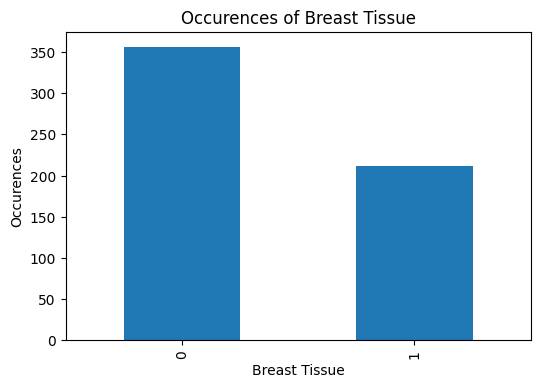

In [4]:
# importing the matplotlib library
import matplotlib.pyplot as plt

# counting the occurrences of dependent variable
categorical_count = cancer_scaled_df['Diagnosis'].value_counts()
print("Number of Values: ", categorical_count)

# plotting a bar chart
plt.figure(figsize=(6, 4))
categorical_count.plot(kind='bar')
plt.title("Occurences of Breast Tissue")
plt.xlabel("Breast Tissue")
plt.ylabel("Occurences")
plt.savefig('C:/GitHub/DataScienceMachineLearning/wk_14/plots/breast_tissue.png', dpi=300, bbox_inches='tight')
plt.show()


## <font color = '#FF8C00'> Section 2 </font> | Experimental Approach
Now, we perform a train / test split using a 70 : 30 ratio. 


In [5]:
# importing the train/test library
from sklearn.model_selection import train_test_split

# setting up the features and target variable
X = cancer_scaled_df.drop(columns=['Diagnosis'])
y = cancer_scaled_df['Diagnosis']

# performing the stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state=42,
    stratify=y
)

In [22]:
# finding total number of rows
k = 10
total_rows = len(cancer_scaled_df)

# finding the total number of rows per fold
rows_per_fold = total_rows // k
print(f"Each fold will have ~{rows_per_fold} rows.")

Each fold will have ~56 rows.


## <font color = '#FF8C00'> Section 3 </font> | The Modeling Stage
In this section, we build three models using 10 fold cross validation, a logistic regression with all features, a "greedy" logistic regression that adds features only if they improve cross-validated accuracy, and a random forest using all features. Next, we statistically compare their accuracies, retrain the best model on the full training set, evaluate it from the test set, and report its ROC curve and AUC.

In [6]:
# importing all required libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

### <font color = '#FF8C00'> Baseline Logistic Regression Model </font>
To start, we use 10-fold cross validation to create and assess a logistic regression baseline model that uses all standardized features. 

In [7]:
# building the model pipeline
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# performing the 10 fold cross validation model on the training set
ten_cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

# printing out the scores
print("Cross Validation Scores: ", ten_cv_scores)

Cross Validation Scores:  [0.95       1.         0.95       1.         1.         1.
 0.925      0.94871795 0.94871795 0.94871795]


### <font color = '#FF8C00'> Greedy Logistics Regression </font>
Now, we build a logistic regression model by evaluating each feature individually using 10 fold cross-validation, then ranking them by accuracy. Starting with the best-performing feature, we add the other features one by one, keeping only the ones that increase the model's average cross-validated accuracy. 

In [8]:
# dictionary for scores
individual_scores = {}

# for looping through the features
for feature in X.columns:
    model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
    scores = cross_val_score(model, X_train[[feature]], y_train, cv=10, scoring='accuracy')
    individual_scores[feature] = scores.mean()

# sorting the features in descending order
sorted_features = sorted(individual_scores.items(), key=lambda x: x[1], reverse=True)

In [9]:
# list for selecting best features
selected_features = []
best_accuracy = 0


# the greedy selection process
for feature, score in sorted_features:
    trial_features = selected_features + [feature]
    trial_X = X[trial_features].loc[X_train.index] 

    model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
    scores = cross_val_score(model, trial_X, y_train, cv=10, scoring='accuracy')
    mean_value = scores.mean()

    # if function for checking if best accuracy or not
    if mean_value > best_accuracy:
        selected_features.append(feature)
        best_accuracy = mean_value

# printing out all selected features
print(selected_features)

['area3', 'perimeter3', 'concave_points1', 'concave_points3', 'area2', 'concavity3', 'texture3', 'smoothness1']


In [10]:
# selected features
X_greedy = X[selected_features]

# running the ten fold cross validation process
greedy_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
greedy_scores = cross_val_score(greedy_model, X_greedy, y, cv=10, scoring='accuracy')

# printing out the scores
print(greedy_scores)

[0.98245614 0.94736842 0.96491228 0.96491228 0.98245614 0.98245614
 0.92982456 0.98245614 1.         0.96428571]


### <font color = '#FF8C00'> Random Forest Classifier </font>
Lastly, we use a 10 fold cross validation to create and assess a random forest classifier that uses all standardized features. 

In [11]:
# importing the random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# creating the random forest model
rf_model = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=42))

# performing a 10 fold cross validation
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy')

# printing out the results
print("Ranfom Forest Accuracies: ", rf_scores)

Ranfom Forest Accuracies:  [1.         0.975      0.975      1.         0.9        0.975
 0.95       0.92307692 0.8974359  0.94871795]


### <font color = '#FF8C00'> Running Statistical Comparison & Plotting </font>
Now, we run a statistical comparison between the accuracy of the three models. We identify if there is evidence to support one model being "best". We then report the "p-values" and plot the accuracy and standard deviation of the two models. 

In [12]:
# importing the required libraries
import numpy as np
from scipy.stats import ttest_rel

# converting scores into numpy array
baseline_lr_scores = np.array(ten_cv_scores)
greedy_model_scores = np.array(greedy_scores)
random_forest_model_scores = np.array(rf_scores)

# baseline lr model vs greedy model
t1, p1 = ttest_rel(baseline_lr_scores, greedy_model_scores)
print("P1 Score: ", p1)

# greedy model vs random forest model
t2, p2 = ttest_rel(greedy_model_scores, random_forest_model_scores)
print("P2 Scores: ", p2)

# baseline lr model vs rf model
t3, p3 = ttest_rel(baseline_lr_scores, random_forest_model_scores)
print("P3 Scores: ", p3)



P1 Score:  0.78082397168091
P2 Scores:  0.33647337842450925
P3 Scores:  0.3754565298863628


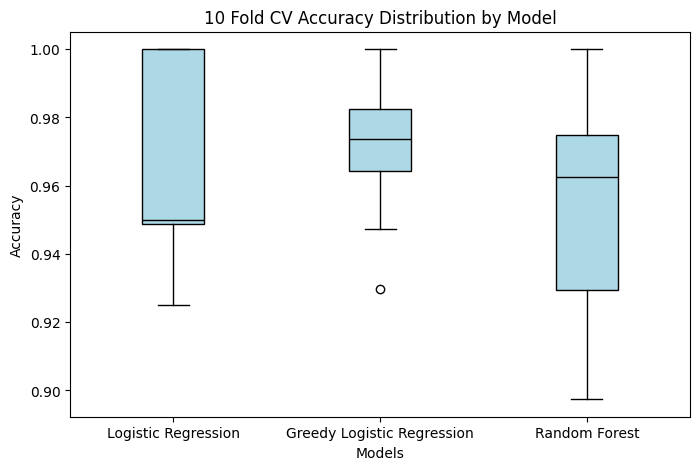

In [13]:
# importing the seaborn library
import seaborn as sns

# setting up the data and labels
data = [baseline_lr_scores, greedy_model_scores, random_forest_model_scores]
labels = ['Logistic Regression', 'Greedy Logistic Regression', 'Random Forest']

# plotting out the box plot
plt.figure(figsize=(8, 5))
plt.boxplot(data, tick_labels=labels, patch_artist=True, boxprops=dict(facecolor='lightblue'), medianprops=dict(color='black'))

plt.title('10 Fold CV Accuracy Distribution by Model')
plt.ylabel('Accuracy')
plt.xlabel('Models')

# save the plot and show it
plt.savefig('C:/GitHub/DataScienceMachineLearning/wk_14/plots/box_plots.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
print(f"Logistic Regression: {baseline_lr_scores.mean()}")
print(f"Greedy Logistic Regression: {greedy_model_scores.mean()}")
print(f"Random Forest: {random_forest_model_scores.mean()}")

Logistic Regression: 0.9671153846153846
Greedy Logistic Regression: 0.9701127819548871
Random Forest: 0.954423076923077


### <font color = '#FF8C00'> Retraining Best Performing Model (Greedy Logisitic Regression) </font>
Now, we move to retrain the best peforming model using all the training data, and then evaluate the model's performance on the test set. We display the accuracy and then plot the ROC curve. 

In [15]:
# importing the required libraries
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# using the selected features
X_train_greedy = X_train[selected_features]
X_test_greedy = X_test[selected_features]

# training the greedy logistic regression model
final_greedy_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
final_greedy_model.fit(X_train_greedy, y_train)

# performing predictions on the test set
y_test_pred = final_greedy_model.predict(X_test_greedy)
y_test_prob = final_greedy_model.predict_proba(X_test_greedy)[:, 1]

# finding the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("The Test Accuracy ", test_accuracy)

The Test Accuracy  0.9649122807017544


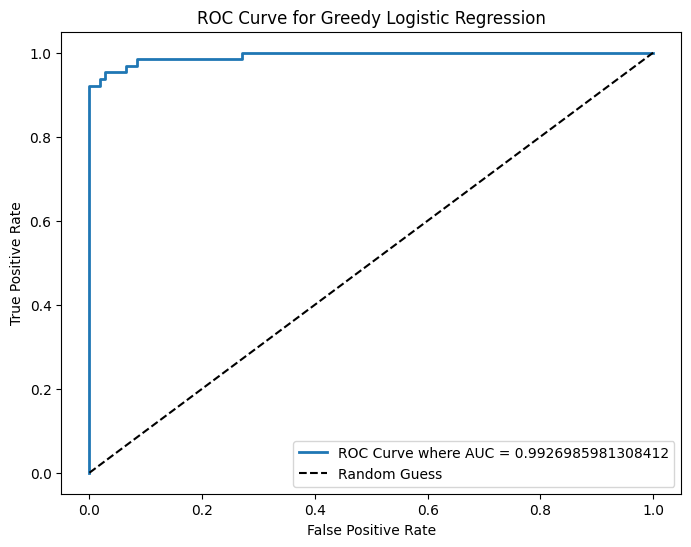

In [16]:
# using roc_curve and roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_prob)
auc_score = roc_auc_score(y_test, y_test_prob)

# plotting out the results
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, label=f'ROC Curve where AUC = {auc_score}', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# adding in the plot details
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Greedy Logistic Regression')
plt.legend(loc='lower right')

# saving and displaying the plot
plt.savefig('C:/GitHub/DataScienceMachineLearning/wk_14/plots/roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

### <font color = '#FF8C00'> Retraining Random Forest </font>
Now, we retrain a single random forest on all of the training data and examine the feature_importances of the random forest.

In [23]:
# training random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# retrieving the feature importances
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
sorted_importances = importances.sort_values(ascending=False)

# finding the top ten features
top_rf_features = sorted_importances.head(10).index.tolist()
print(top_rf_features)

['concave_points1', 'area3', 'concave_points3', 'perimeter3', 'radius3', 'concavity1', 'perimeter1', 'radius1', 'area1', 'concavity3']


In [26]:
# finding differing features
different_features = list(set(top_rf_features) - set(selected_features))
print("Different Features: ", different_features)

# finding features in common
common_features = list(set(top_rf_features) & set(selected_features))
print("Common Features: ", common_features)


Different Features:  ['radius1', 'perimeter1', 'concavity1', 'radius3', 'area1']
Common Features:  ['concave_points1', 'concave_points3', 'concavity3', 'perimeter3', 'area3']


## <font color = '#FF8C00'> Answers to Questions </font> 

### Answers to Section 1 Questions
**Question 1:** Looking at the dataset, we know that it consists of 32 features and 568 observations. The `ID` feature is categorical and is most likely the `ID` of the patient. The `Diagnosis` feature is categorical and tells us if the patient has Benign or Malignant breast tissue. The rest of the 30 features gives us more details about the breast tissue, such as the area, smoothness and many more. For this dataset, we consider the target varibale as the `Diagnosis`.

### Answers to Section 2 Questions
**Question 1:** On average, each fold will have 56 rows

### Answers to Section 3 Questions
**Question 1:** there was no statistically significant evidence that any of the models was the "best". Looking at the p-values, all of them were greater than 0.05, which meant none of the models were statistically significant.

**Question 2:** The greedy logistic regression model and random forest model selected the following features in common: `concave_points1`, `concave_points3`, `concavity3`, `perimeter3`, `area3`. However, some of the features that were in one model and not the other were `radius1`, `perimeter1`, `concavity1`, `radius3`, `area1`. The greedy logistic regression model was the better model due to having the higher cross-validation accuracy of 0.97.  This means the greedy logisitc regression model is effective at identifying predictive features.



### <font color = '#FF8C00'> Small Note </font> 
This is my last lab submission for the course CSC 2621: Introduction to Data Science. When I first started this course, I wasn't sure what I was going to learn. As I worked through these labs, I learnt not just a lot about data science but how math and computer science intersect to produce understanding of datasets through visualization and hypothesis testing, which allows us to come to meaningful results that can be derived from datasets. After this course, I would like to explore data science even further and look more into how I can use other tehcnologies such as SQL, R and Cloud technologies. I would love to explore into how the results I derive can have real-world impacts, which I look forward to doing in the form of personal projects over the summer.